# __Xente Fraud Detection Challenge__

Our goal: Accurately classify the fraudulent transactions from Xente's e-commerce platform.

# Intro

Xente is an e-commerce and financial service app serving 10,000+ customers in Uganda.

This dataset includes a sample of approximately 140,000 transactions that occurred between 15 November 2018 and 15 March 2019.

# Load the data set

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
# Xente variable definitions
variable_def =pd.read_csv('data/Xente_Variable_Definitions.csv')
variable_def

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


The data is split into test and train already:

In [3]:
test_raw =pd.read_csv('data/test.csv')
train_raw =pd.read_csv('data/training.csv')

In [4]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         45019 non-null  object 
 1   BatchId               45019 non-null  object 
 2   AccountId             45019 non-null  object 
 3   SubscriptionId        45019 non-null  object 
 4   CustomerId            45019 non-null  object 
 5   CurrencyCode          45019 non-null  object 
 6   CountryCode           45019 non-null  int64  
 7   ProviderId            45019 non-null  object 
 8   ProductId             45019 non-null  object 
 9   ProductCategory       45019 non-null  object 
 10  ChannelId             45019 non-null  object 
 11  Amount                45019 non-null  float64
 12  Value                 45019 non-null  int64  
 13  TransactionStartTime  45019 non-null  object 
 14  PricingStrategy       45019 non-null  int64  
dtypes: float64(1), int6

In [5]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

The final submission result should be showing the transaction id of the test data set and the predicted result of whether it is fraudulent or not:

In [6]:
sample_submission =pd.read_csv('data/sample_submission.csv')
print(sample_submission.shape)
sample_submission.head()

(45019, 2)


,TransactionId,FraudResult
0,TransactionId_50600,NaN
1,TransactionId_95109,NaN
2,TransactionId_47357,NaN
3,TransactionId_28185,NaN
4,TransactionId_22140,NaN


- Training.csv: Transactions from 15 November 2018 to 13 February 2019, including whether or not each transaction is fraudulent. We will use this file to train our model.
- Test.csv: Transactions from 13 February 2019 to 14 March 2019, not including whether or not each transaction is fraudulent. We will test our model on this file.

In [7]:
test_raw.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy'],
      dtype='object')

In [8]:
train_raw.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

One of the challenges of fraud detection problems is that the data is highly imbalanced:

In [9]:
train_raw.groupby('FraudResult').size()

FraudResult
0    95469
1      193
dtype: int64

In [10]:
train_raw.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# A closer look at the fraudulent incidences

In [11]:
# Create a dataframe for fraud cases
fraud = train_raw[train_raw['FraudResult'] == 1]

# Number of unique features that are fraudulent compared to the train dataset
print("Number of fraudulent Batches:", fraud['BatchId'].nunique())
print('\n')
print("Number of fraudulent Accounts:", fraud['AccountId'].nunique())
print("Number of fraudulent Subscriptions:", fraud['SubscriptionId'].nunique())
print("Number of fraudulent Customers:", fraud['CustomerId'].nunique())
print('\n')
print("Number of fraudulent Providers:", fraud['ProviderId'].nunique())
print("Number of all Providers:", train_raw['ProviderId'].nunique())
print('\n')
print("Number of fraudulent Products:", fraud['ProductId'].nunique())
print("Number of all Products:", train_raw['ProductId'].nunique())
print('\n')
print("Number of fraudulent Product Category:", fraud['ProductCategory'].nunique())
print("Number of all Product Category:", train_raw['ProductCategory'].nunique())
print('\n')
print("Number of fraudulent Channels:", fraud['ChannelId'].nunique())
print("Number of all Channels:", train_raw['ChannelId'].nunique())
print('\n')
print("Number of fraudulent Pricing Strategies:", fraud['PricingStrategy'].nunique())
print("Number of all Pricing Strategies:", train_raw['PricingStrategy'].nunique())


Number of fraudulent Batches: 183


Number of fraudulent Accounts: 52
Number of fraudulent Subscriptions: 52
Number of fraudulent Customers: 54


Number of fraudulent Providers: 5
Number of all Providers: 6


Number of fraudulent Products: 9
Number of all Products: 23


Number of fraudulent Product Category: 4
Number of all Product Category: 9


Number of fraudulent Channels: 3
Number of all Channels: 4


Number of fraudulent Pricing Strategies: 4
Number of all Pricing Strategies: 4


From above, the batchid doesnt seem a good feature to use. The account/subscription/customer show that the same account/subscription/customer tend to fraud more than once, therefore creating a boolean of whether the account has a fraud history could be a good indicator of fraud prediction. The product and product category seem to centralise more on certain categories, making them possible indicators of fraud as well. 

<AxesSubplot:>

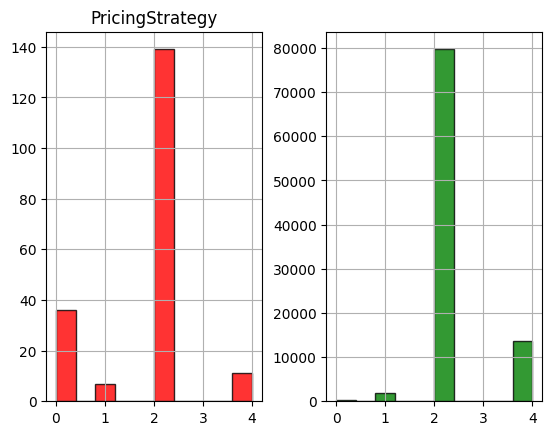

In [12]:
# Plot distributions of features and compare between fraud and non-fraud side by side

fig, axes = plt.subplots(1, 2)

fraud.hist('PricingStrategy', color='red', alpha=0.8, ax=axes[0])
train_raw[train_raw['FraudResult']==0]['PricingStrategy'].hist(color='green', label='FraudResult: 1', alpha=0.8, ax=axes[1])

Pricing strategy doesnt seem to be systematically different for fraud and non-fraud cases.

# Data cleaning and feature engineering

### Feature engineering #1: Replace string with numeric values

These features are strings and we want to remove the strings and only look at the numeric values: AccountId, ProviderId, ProductId, ProductCategory, ChannelId

### Feature engineering #2: Value catogory - large or small

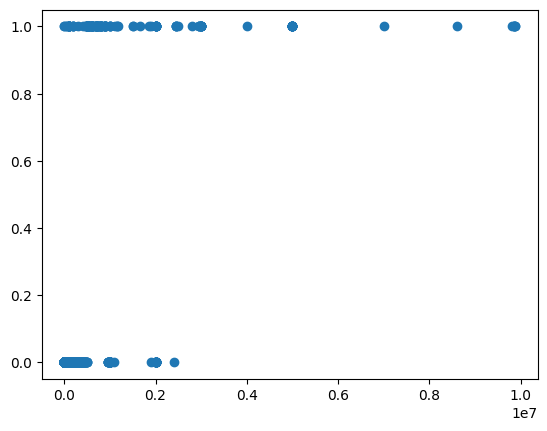

In [13]:
# Plot the value and compare fraud and non fraud values

train_raw_value = train_raw.Value
FraudResult_raw = train_raw.FraudResult

plt.scatter(train_raw_value,FraudResult_raw)
plt.show()

It shows that when the value is above a certain threshold, all the cases are fraudulent.

In [14]:
# Get the maximum value for a non-fraudulent transaction to determine the threshold for 
# whether the transaction value is "large" or "small".

train_raw[(train_raw.FraudResult == 0)]['Value'].max()

2400000

In [15]:
# Create a new feature 'Value_cat' based on the above threshold.

train_raw['Value_cat'] = pd.cut(train_raw['Value'], bins=[0, 2400000, float('Inf')], labels=['small', 'large'])

In [16]:
train_raw.groupby('Value_cat').count()['TransactionId']

Value_cat
small    95621
large       41
Name: TransactionId, dtype: int64

The new categorical feature "Value_cat" divides the transaction value into either "large" or "small". All 41 large transactions are fraudulent, which makes "Value_cat" a factor to determine fraud.

### Feature engineering #3: direction of transaction (incoming/outgoing)

In [17]:
# Create a new feature 'trans_direction' based on whether it is negative or positive


train_raw['trans_direction'] = 'outgoing'
train_raw.loc[(train_raw['Amount'] >= 0), 'trans_direction'] = 'incoming'

In [18]:
train_raw[(train_raw.FraudResult == 1)].groupby('trans_direction').count()['TransactionId']

trans_direction
incoming    188
outgoing      5
Name: TransactionId, dtype: int64

In [19]:
train_raw[(train_raw.FraudResult == 0)].groupby('trans_direction').count()['TransactionId']

trans_direction
incoming    57285
outgoing    38184
Name: TransactionId, dtype: int64

We can see that the fraudulent transactions are significantly more in incoming direction than outgoing, therefore this feature should be a good indicator for fraud detection.

### Feature engineering #3: account fraud history (True/False)

Accounts with a fraud history is high risk account and should be marked in the dataset.

### Feature engineering #4: transaction time of day & day of week